<H1>Top Scottsdale Venue Category to Invest In - Coursera IBM Capstone Project</H>

<H2>1 - Introduction

    Scottsdale is a city in the eastern part of Maricopa County, Arizona, United States, part of the Greater Phoenix Area. Named Scottsdale in 1894 after its founder Winfield Scott, a retired U.S. Army chaplain, the city was incorporated in 1951 with a population of 2,000. The 2018 population of the city was estimated to be 255,310 according to the U.S. Census Bureau. The New York Times described downtown Scottsdale as "a desert version of Miami's South Beach" and as having "plenty of late night partying and a buzzing hotel scene."[5] Its slogan is "The West's Most Western Town."

    Scottsdale, 31 miles long and 11.4 miles wide at its widest point, shares boundaries with many other municipalities and entities. On the west, Scottsdale is bordered by Phoenix, Paradise Valley and unincorporated Maricopa County land. Carefree is located along the western boundary, as well as sharing Scottsdale's northern boundary with the Tonto National Forest. To the south Scottsdale is bordered by Tempe. The southern boundary is also occupied by the Salt River Pima-Maricopa Indian Community, which extends along the eastern boundary, which also borders Fountain Hills, the McDowell Mountain Regional Park and more unincorporated Maricopa County land.

    A group of investors want to invest in a business (or acquire those businesses) with the most venues in one of the neighborhoods in Scottsdale.  They must choose North Scottsdale, Downtown Scottsdale, or Paradise Valley in order to make their decision. They also want to see how these venues are located with other venue categories in the neighborhood.   

    The objective is to display the 10 top Venue Categories in each neighborhood and map the top venue category.



<H2>2 - Data

    1 - Select 3 Scottsdale neighborhoods from https://download.geonames.org/export/dump/US.zip and retrieve their neighborhood center addresses.  
    
    2 - Use geopy.geocoders to find the latitude and longitude of the 3 neighborhoods, North Scottsdale, Downtown Scottsdale, and Paradise Valley

    3 - Foursquare API to collect information on venues and venue categories in the neighborhoods



<H2>3 - Approach

    Select 3 Scottsdale Neighborhoods from  https://download.geonames.org/export/dump/US.zip

    Using FourSquare API, find nearby venues for each neighborhood.
    
    Create resuable python functions to draw maps, pull neighborhood venue from Foursquare, and draw bar charts.

    Find the top 10 venue categories and graph them into a bar chart.

    Display map for the top venue category for each neighborhood. 

    Recommend to the investors which business and neighborhood is best to invest in or acquire. 

<H2>4 - Results

The result is the identification of the top venue category by number of venues in each of the 3 neighborhoods in Scottsdale.

Bar charts per neighborhood will show the top Venue Category and how it is ranked among other categories or businesses. 

Then the top Venue Category is mapped using folium map rendering library to reflect where the venues are located with respect to the center of the neighborhood and with respect to other venue categories.  Please see report for graphs and analysis.


<H2>5 - Discussion

Since the Coffee Shop Venue category is the top category in all 3 neighborhoods, would the investors be interested in investing or acquiring the second most popular venue category?
The ‘Bar’ category is most popular in both Downtown Scottsdale and Paradise Valley, would the investors consider in investing in both bar and coffee shop categories in the same time?

Which has a better return on investment? Bars or coffee shops?
Does the proximity to the center of the neighborhood affect the investors’ decision? Definitely for Downtown Scottsdale, the coffee shops are closer to the center of the neighborhood than the other neighborhoods.


<H2>6 - Conclusion 

Both Downtown Scottsdale and Paradise Valley have 7 coffee shop venues each.  However, 
Coffee shops in Downtown Scottsdale are closer to the center of the neighborhood.  This might mean more traffic and more revenues.   More financial analysis is needed to determine the capital required to acquire or invest in these businesses, as well as further ROI calculation required to make the final decision.      


<H2>Limitations

The accuracy of data depends purely depends on the data provided by FourSquare

More financial analysis needed on the capital required and on the return on investment, in order to make a sound decision

## Import Libraries and install necessary components

In [275]:
!pip install beautifulsoup4
!pip install lxml
!pip install geopy
!pip install geopandas
!pip install pandasql

import pandas as pd
import pandasql as ps

import numpy  as np
import json
import requests
import lxml.html
import folium # map rendering library
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from bs4 import BeautifulSoup # library to parse HTML and XML documents

CLIENT_ID = 'WJR5DQDPRMUNTMUWUHZSJE2M3WEDNAV3DUDIOKFDXDNTZH3C' # your Foursquare ID
CLIENT_SECRET = 'AFYT44BW3RXECF1Q0XPCEUY4NQKN5NQ20J5R3PKYNIATRVBI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# defining radius and limit of venues to get
radius=2000
LIMIT=100

Your credentails:
CLIENT_ID: WJR5DQDPRMUNTMUWUHZSJE2M3WEDNAV3DUDIOKFDXDNTZH3C
CLIENT_SECRET:AFYT44BW3RXECF1Q0XPCEUY4NQKN5NQ20J5R3PKYNIATRVBI


---

<H4> Read CSV

In [276]:
import pandas as pd
#df = pd.read_csv('AZ_Cities.csv', thousands=',')
df = pd.read_csv('Scottsdale.csv', thousands=',')
df.head(5)

,Neighborhood,Name,Type,County,State,Country,Population,Area_sq_mi,Area_sq_km,Population_density_sq_mi,Population_density_sq_km
0,North Scottsdale,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4
1,Downtown Scottsdale,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4
2,Gainey Ranch,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4
3,Paradise Valley,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4
4,McCormick Ranch,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4


<H4>Concatenate Neighborhood, City, County, State, Country into Address 

In [277]:
#Concatenate City,County, State, Country into Location
df['Address'] = df['Neighborhood'] + ', ' +  df['Name'] + ', ' + df['County']+ ', ' + df['State']+ ', ' + df['Country']
df.head(2)

,Neighborhood,Name,Type,County,State,Country,Population,Area_sq_mi,Area_sq_km,Population_density_sq_mi,Population_density_sq_km,Address
0,North Scottsdale,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4,"North Scottsdale, Scottsdale, Maricopa, AZ, USA"
1,Downtown Scottsdale,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4,"Downtown Scottsdale, Scottsdale, Maricopa, AZ,..."


<H4>Convert Address to latitude and longitude values

In [278]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.extra.rate_limiter import RateLimiter

locator = Nominatim(user_agent="myGeocoder")
#location = locator.geocode("Champ de Mars, Paris, France")

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df['location'] = df['Address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df.head(5)

,Neighborhood,Name,Type,County,State,Country,Population,Area_sq_mi,Area_sq_km,Population_density_sq_mi,Population_density_sq_km,Address,location,point,latitude,longitude,altitude
0,North Scottsdale,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4,"North Scottsdale, Scottsdale, Maricopa, AZ, USA","(Scottsdale, North Airport Drive, Desert Wind ...","(33.621417750000006, -111.91606381195308, 0.0)",33.621418,-111.916064,0.0
1,Downtown Scottsdale,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4,"Downtown Scottsdale, Scottsdale, Maricopa, AZ,...","(Downtown Scottsdale, Scottsdale, Maricopa Cou...","(33.4950044, -111.9261128, 0.0)",33.495004,-111.926113,0.0
2,Gainey Ranch,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4,"Gainey Ranch, Scottsdale, Maricopa, AZ, USA","(Gainey Ranch, Scottsdale, Maricopa County, Ar...","(33.5711536, -111.917367, 0.0)",33.571154,-111.917367,0.0
3,Paradise Valley,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4,"Paradise Valley, Scottsdale, Maricopa, AZ, USA","(Scottsdale, Maricopa County, Arizona, United ...","(33.4942189, -111.9260184, 0.0)",33.494219,-111.926018,0.0
4,McCormick Ranch,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,477.6,1182.0,456.4,"McCormick Ranch, Scottsdale, Maricopa, AZ, USA","(McCormick Ranch, Scottsdale, Maricopa County,...","(33.5525429, -111.9020886, 0.0)",33.552543,-111.902089,0.0


<H4>Keep only Neighborhood and coordinates

In [279]:
df = df.drop(['Address', 'point', 'altitude', 'location','Population_density_sq_km', 'Area_sq_km'], axis=1)
df.head(5)

,Neighborhood,Name,Type,County,State,Country,Population,Area_sq_mi,Population_density_sq_mi,latitude,longitude
0,North Scottsdale,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,1182.0,33.621418,-111.916064
1,Downtown Scottsdale,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,1182.0,33.495004,-111.926113
2,Gainey Ranch,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,1182.0,33.571154,-111.917367
3,Paradise Valley,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,1182.0,33.494219,-111.926018
4,McCormick Ranch,Scottsdale,City,Maricopa,AZ,USA,217385,184.4,1182.0,33.552543,-111.902089


<H4>Draw Map of Neighborhoods

In [280]:
import folium # map rendering library

map1 = folium.Map(
   location=[33.621418,-111.916064],
#  tiles='cartodbpositron',
#  tiles='Stamen Toner',
#  tiles='OpenStreetMap',
#  tiles='Stamen Terrain',
   tiles='cartodbpositron',
   zoom_start=11,
)
df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]
                                        ,radius=13
                                        ,color='crimson'
                                        ,linewidth=1
                                        ,fill=True
                                        ,fill_color='crimson'
                                        ).add_child(folium.Popup(row["Neighborhood"])).add_to(map1), axis=1)

map1

<H4> Foursquare Parameter Initialization Section

In [281]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests

CLIENT_ID = 'WJR5DQDPRMUNTMUWUHZSJE2M3WEDNAV3DUDIOKFDXDNTZH3C' # your Foursquare ID
CLIENT_SECRET = 'AFYT44BW3RXECF1Q0XPCEUY4NQKN5NQ20J5R3PKYNIATRVBI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

radius = 2000
LIMIT = 100


<H4>Function Load_Neigborhood(i) - To load neigborhood and convert Foursquare API result to dataframe format

In [282]:
def Load_Neigborhood(i):
            neighborhood_name = df.loc[i, 'Neighborhood']
            neighborhood_latitude = df.loc[i, 'latitude'] 
            neighborhood_longitude = df.loc[i, 'longitude'] 
            # limit of number of venues returned by Foursquare API
            LIMIT = 200 
            radius = 3000
            print(neighborhood_name , neighborhood_latitude, neighborhood_longitude)

            #Part 2

            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                neighborhood_latitude, 
                neighborhood_longitude, 
                radius, 
                LIMIT)
            #results = requests.get(url).json()
            results = requests.get(url).json()["response"]['groups'][0]['items']
            #print(results)

            #Part 3

            venues_list=[]
            print(venues_list) 

            venues_list.append([(

                        v['venue']['categories'][0]['shortName'],
                        v['venue']['name'], 
                        v['venue']['location']['lat'], 
                        v['venue']['location']['lng'],
                        v['venue']['location']['distance'],
                        v['venue']['location']['city'],
                        v['venue']['location']['state'],  
                        v['venue']['location']['cc']

                )for v in results])

            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = [ 
                              'Category',
                              'Venue', 
                              'Latitude', 
                              'Longitude',
                              'Distance',
                              'City',
                              'State',
                              'Country']
            nearby_venues.head(5)    

                #'postalCode': '85251', 'cc': 'US', 'city': 'Scottsdale', 'state': 'AZ', 'country': 'United States',



            return nearby_venues


<H4>Function Chart1() - Chart for Top 10 Venue Categories in the Neighborhood 

In [283]:
def Chart1():
    
    q1 = """SELECT Category, Count(Category) AS Count  FROM nearby_venues  Group By Category  ORDER BY  Count(Category) DESC"""
    #print(ps.sqldf(q1, locals()))
    Dataframe_A = ps.sqldf(q1, globals())

    q2 = """SELECT * FROM Dataframe_A LIMIT 10 """
    Chart_Data = ps.sqldf(q2, locals())
    # print(Chart_Data)

    plt.figure(figsize=(9,5), dpi = 100)
    # title
    plt.title('Top 10 Venue Categories in the Neighborhood')
    #On x-axis
    plt.xlabel('Category', fontsize = 15)
    #On y-axis
    plt.ylabel('Number of Venues', fontsize=15)
    #giving a bar plot
    Chart_Data.groupby('Category')['Count'].sum().plot(kind='bar')
    #legend
    #plt.legend()
    #displays the plot
    return plt.show()
    

<H4>Function DrawMap() - For Drawing maps based nearby_venues dataframe which is returned by Load_Neigborhood(i) 

In [284]:
def DrawMap():
   
    # pulling the Category with thie most venues
    q1 = """SELECT Category, Count(Category) AS Count  FROM nearby_venues  Group By Category  ORDER BY  Count(Category) DESC LIMIT 1"""
    Top_10_Venues = ps.sqldf(q1, globals())
    #Join to q1 to retrieve list of venues with lat and lon on the top 1 category
    q2 = """SELECT * FROM nearby_venues A1 INNER JOIN Top_10_Venues A2 on  A1.Category = A2.Category"""
    Venues_of_Interest = ps.sqldf(q2, globals())

     #   print(Venues_of_Interest)  
     
    map1 = folium.Map(
    location=[neighborhood_latitude, neighborhood_longitude],
    #  tiles='cartodbpositron',
    #  tiles='Stamen Toner',
    #  tiles='OpenStreetMap',
    #  tiles='Stamen Terrain',
    tiles='cartodbpositron',
    zoom_start=15,
    )
    nearby_venues.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]]
    ,radius=5
    ,color='grey'
    ,linewidth=1
    ,fill=True
    ,fill_color='grey'
    ).add_child(folium.Popup('Test')).add_to(map1), axis=1)

    df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]
    ,radius=13
    ,color='crimson'
    ,linewidth=1
    ,fill=True
    ,fill_color='crimson'
    ).add_child(folium.Popup(row["Neighborhood"])).add_to(map1), axis=1)

    Venues_of_Interest.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]]
    ,radius=6
    ,color='orange'
    ,linewidth=5
    ,fill=True
    ,fill_color='orange'
    ).add_child(folium.Popup('Test')).add_to(map1), axis=1)
    
    legend_html =   '''
            <div style="position: fixed; 
                        bottom: 50px; left: 50px; width: 200px; height: 90px; 
                        border:2px solid grey; z-index:9999; font-size:14px;
                        ">&nbsp; Legend <br>
                          &nbsp; Top Venue Category     &nbsp; <i class="fa fa-circle fa-1x" style="color:orange"></i><br>
                          &nbsp; Other Venue Categories &nbsp; <i class="fa fa-circle fa-1x" style="color:grey"></i>
            </div>
            ''' 
    
    map1.get_root().html.add_child(folium.Element(legend_html)) 
    
    map1
        
    return map1

<H4>Draw Map and Chart for Neighborhood 1 - Downtown Scottsdale Analysis

Downtown Scottsdale 33.4950044 -111.9261128
[]


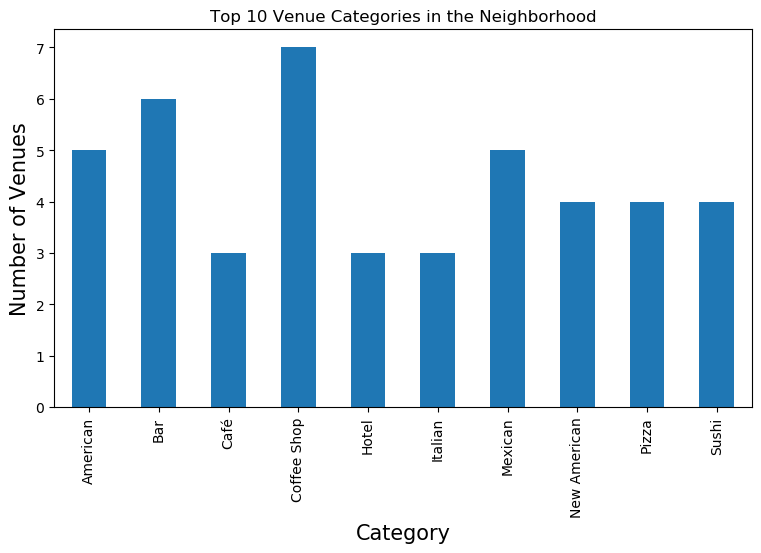

In [287]:
nearby_venues = Load_Neigborhood(1)
Chart1()
DrawMap()

<H4>Draw Map and Chart for Neighborhood 2 - Downtown Scottsdale Analysis

North Scottsdale 33.621417750000006 -111.91606381195308
[]


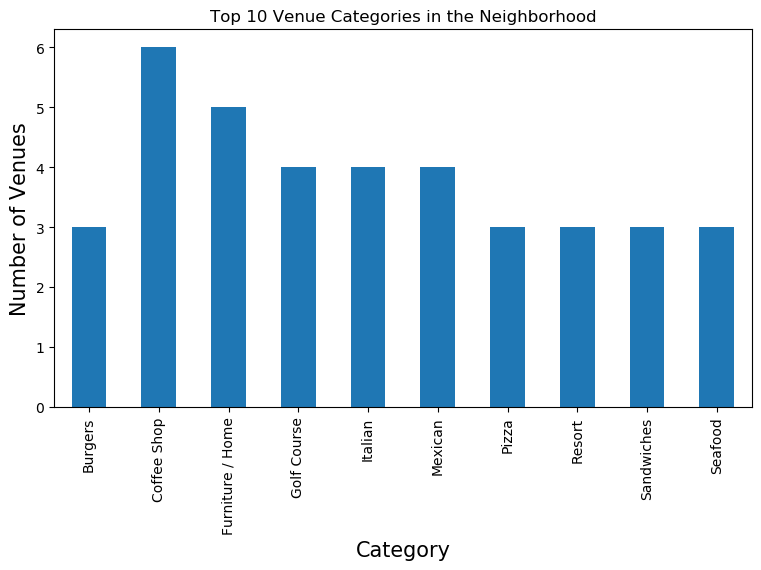

In [288]:
nearby_venues = Load_Neigborhood(0)
Chart1()
DrawMap()

<H4>Draw Map and Chart for Neighborhood 3 - Paradise Valley Analysis

Paradise Valley 33.4942189 -111.9260184
[]


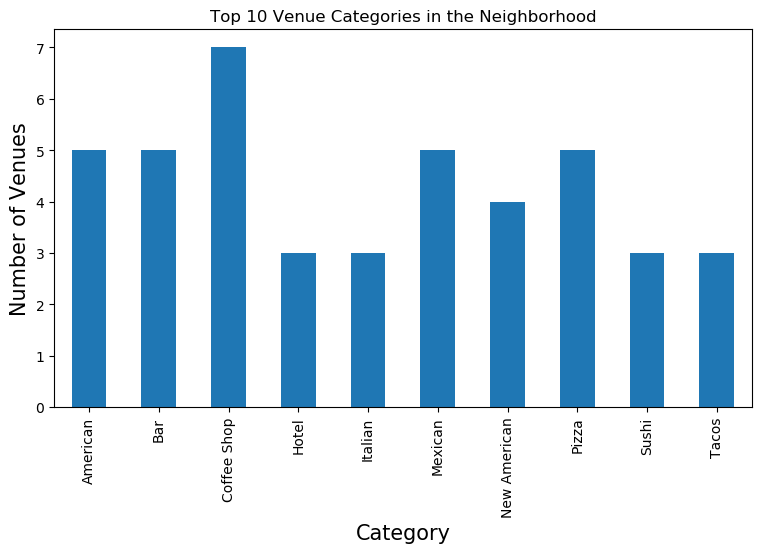

In [292]:
nearby_venues = Load_Neigborhood(3)
Chart1()
DrawMap()

<H4>Save a copy of nearby_venues in csv format

In [293]:
#df.to_csv('Neighborhoods.csv',index=False)
#nearby_venues.to_csv('nearby_venues.csv',index=False)